In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.regularizers import l2

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

C:\Users\u0107464\AppData\Local\Continuum\anaconda3\envs\ML_research\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\u0107464\AppData\Local\Continuum\anaconda3\envs\ML_research\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load data

In [2]:
data_path = 'C:/Users/u0107464/OneDrive/PythonScript/Arch_model_design_space_exp/Model_extracted_data/Data/Correlation_analysis/'

data = pd.read_csv(data_path+'Correlation_analysis_chiller_data.csv')
data.head()

,$X,$Y,$H,$SL1,$SL2,$SL3,$SL4,$WWR_S,$WWR_N,$WWR_E,...,$ChillerTypeCat,Peak: Ground Floor,Peak: Intermediate Floor,Peak: Top Floor,Mean: Ground Floor,Mean: Intermediate Floor,Mean: Top Floor,Peak: Chiller Energy,Mean: Chiller Energy,Total: Chiller Energy
0,20.0,20.0,3.000,0.01000,0.01000,0.01000,0.01000,0.0100,0.0100,0.0100,...,0,11337.83316,11414.46115,10412.70053,2113.167496,2487.05647,2407.259478,24023.1954,9511.314472,8.331911e+07
1,50.0,50.0,4.500,2.50500,2.50500,2.50500,2.50500,0.4800,0.4800,0.4800,...,0,153385.91250,156708.68690,131153.98670,21212.919620,23818.69559,21388.286380,180486.0413,55010.154130,4.818890e+08
2,65.0,35.0,3.750,1.25750,3.75250,3.75250,1.25750,0.7150,0.7150,0.7150,...,1,101713.18150,105411.62670,95695.13032,15004.982930,17410.29156,15835.306020,107845.8289,41685.852000,3.651681e+08
3,35.0,65.0,5.250,3.75250,1.25750,1.25750,3.75250,0.2450,0.2450,0.2450,...,0,117188.67960,124974.75170,113182.75430,19501.604010,22144.84171,20849.448860,182746.3519,61094.038630,5.351838e+08
4,42.5,42.5,4.875,4.37625,1.88125,0.63375,1.88125,0.8325,0.8325,0.5975,...,1,202009.34090,209944.82950,170183.17070,21693.299280,23712.53308,21126.595210,275340.6081,90263.074890,7.907045e+08


In [3]:
data.describe()

,$X,$Y,$H,$SL1,$SL2,$SL3,$SL4,$WWR_S,$WWR_N,$WWR_E,...,$ChillerTypeCat,Peak: Ground Floor,Peak: Intermediate Floor,Peak: Top Floor,Mean: Ground Floor,Mean: Intermediate Floor,Mean: Top Floor,Peak: Chiller Energy,Mean: Chiller Energy,Total: Chiller Energy
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4.500000e+03,4500.000000,4500.000000,4500.000000,4500.000000,4.500000e+03,4500.000000,4.500000e+03
mean,50.017578,50.002578,4.498527,2.502031,2.501615,2.504500,2.505292,0.480275,0.479707,0.480241,...,0.499333,137889.767218,4.348202e+05,125083.567595,20712.528801,75599.127636,21589.030238,2.911769e+05,101808.056058,8.918386e+08
std,17.322179,17.323634,0.866154,1.440758,1.440689,1.440707,1.440686,0.271381,0.271375,0.271394,...,0.500055,70088.535009,3.451883e+05,61093.359096,10860.635127,62269.478774,11225.173658,1.925209e+05,66490.230952,5.824544e+08
min,20.000000,20.000000,3.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.000000,11323.335280,1.141446e+04,10399.375350,2113.167496,2487.056470,2407.259478,2.402320e+04,9434.070998,8.264246e+07
25%,34.992676,34.992676,3.749268,1.256282,1.256282,1.256282,1.256891,0.244885,0.244885,0.244885,...,0.000000,84457.472250,1.655355e+05,78011.481200,12462.219070,27482.536790,13077.789000,1.514525e+05,53591.794567,4.694641e+08
50%,49.985352,49.985352,4.498535,2.502563,2.502563,2.502563,2.503782,0.479771,0.479771,0.479771,...,0.000000,125632.954750,3.424381e+05,114395.971450,18762.916390,58205.032445,19384.319960,2.411453e+05,85162.206215,7.460209e+08
75%,64.978027,64.978027,5.247803,3.748845,3.748845,3.748845,3.750673,0.714656,0.714656,0.714656,...,1.000000,179025.424300,6.141979e+05,161306.232100,26941.787840,108004.963200,27957.939685,3.815975e+05,133061.798275,1.165621e+09
max,79.970703,79.970703,5.997070,4.995127,4.995127,4.995127,4.997563,0.949541,0.949541,0.949541,...,1.000000,499700.688800,2.497191e+06,408189.815400,70820.685020,415246.675100,69058.712140,1.557656e+06,524017.105100,4.590390e+09


C:\Users\u0107464\AppData\Local\Continuum\anaconda3\envs\ML_research\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\u0107464\AppData\Local\Continuum\anaconda3\envs\ML_research\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\u0107464\AppData\Local\Continuum\anaconda3\envs\ML_research\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

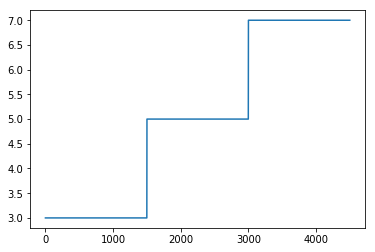

In [4]:
data['Number_of_zones'] = 0

data['Number_of_zones'][0:1500] =3  
data['Number_of_zones'][1500*1:1500*2] = 5  
data['Number_of_zones'][1500*2:1500*3] = 7  
data['Number_of_zones'].plot()

In [5]:
data.columns

Index(['$X', '$Y', '$H', '$SL1', '$SL2', '$SL3', '$SL4', '$WWR_S', '$WWR_N',
       '$WWR_E', ' $WWR_W', '$ORI', '$WALL_U', '$WIN_U', '$GFLOOR_U',
       ' $FLOOR_SH', '$ROOF_U', '$WIN_G', '$ACH', '$LHG', '$EHG',
       '$ChillerCOP', '$BoilerEfficiency', '$ChillerPumpTypeCat',
       '$BoilerPumpTypeCat', '$ChillerTypeCat', 'Peak: Ground Floor',
       'Peak: Intermediate Floor', 'Peak: Top Floor', 'Mean: Ground Floor',
       'Mean: Intermediate Floor', 'Mean: Top Floor', 'Peak: Chiller Energy',
       'Mean: Chiller Energy', 'Total: Chiller Energy', 'Number_of_zones'],
      dtype='object')

# Input features 

In [6]:
x_list = ['$X', '$Y', '$H', '$SL1', '$SL2', '$SL3', '$SL4', '$WWR_S', '$WWR_N',
       '$WWR_E', ' $WWR_W', '$ORI', '$WALL_U', '$WIN_U', '$GFLOOR_U',
       ' $FLOOR_SH', '$ROOF_U', '$WIN_G', '$ACH', '$LHG', '$EHG',
       '$ChillerCOP', '$ChillerPumpTypeCat','$ChillerTypeCat','Number_of_zones']

x = data.filter(items=x_list).values
scalar_x = MinMaxScaler()
x = scalar_x.fit_transform(x)

y = data['Total: Chiller Energy'].values.reshape(len(x),1)
scalar_y = MinMaxScaler()
y = scalar_y.fit_transform(y)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear regression

In [8]:
linear_model = sm.OLS(y_train, x_train).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     2394.
Date:                Thu, 07 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:17:41   Log-Likelihood:                 5508.6
No. Observations:                3600   AIC:                        -1.097e+04
Df Residuals:                    3575   BIC:                        -1.081e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1971      0.003     66.181      0.0

In [9]:
y_test_pred = linear_model.predict(x_test)

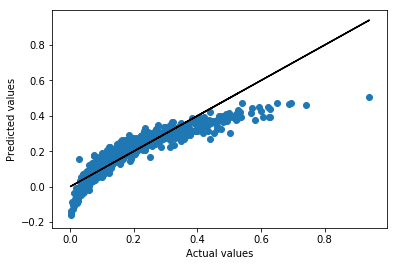

R^2  0.8207203027660616


In [10]:
plt.scatter(y_test,y_test_pred)
plt.plot(y_test,y_test,'black')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

print("R^2 ",metrics.r2_score(y_test,y_test_pred))

# Neural network 

In [11]:
model = Sequential()
model.add(Dense(60, input_dim=len(x_list), activation='relu'))
model.add(Dense(1, activation='relu'))

Adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mse', optimizer=Adam)

In [12]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=200, batch_size=50, verbose=2)

Train on 3600 samples, validate on 900 samples
Epoch 1/200
 - 1s - loss: 0.0239 - val_loss: 0.0106
Epoch 2/200
 - 0s - loss: 0.0064 - val_loss: 0.0046
Epoch 3/200
 - 0s - loss: 0.0039 - val_loss: 0.0032
Epoch 4/200
 - 0s - loss: 0.0031 - val_loss: 0.0028
Epoch 5/200
 - 0s - loss: 0.0025 - val_loss: 0.0024
Epoch 6/200
 - 0s - loss: 0.0022 - val_loss: 0.0021
Epoch 7/200
 - 0s - loss: 0.0021 - val_loss: 0.0021
Epoch 8/200
 - 0s - loss: 0.0020 - val_loss: 0.0019
Epoch 9/200
 - 0s - loss: 0.0018 - val_loss: 0.0019
Epoch 10/200
 - 0s - loss: 0.0018 - val_loss: 0.0018
Epoch 11/200
 - 0s - loss: 0.0017 - val_loss: 0.0023
Epoch 12/200
 - 0s - loss: 0.0016 - val_loss: 0.0017
Epoch 13/200
 - 0s - loss: 0.0015 - val_loss: 0.0016
Epoch 14/200
 - 0s - loss: 0.0014 - val_loss: 0.0015
Epoch 15/200
 - 0s - loss: 0.0013 - val_loss: 0.0015
Epoch 16/200
 - 0s - loss: 0.0013 - val_loss: 0.0014
Epoch 17/200
 - 0s - loss: 0.0012 - val_loss: 0.0014
Epoch 18/200
 - 0s - loss: 0.0012 - val_loss: 0.0013
Epoch 19

Epoch 138/200
 - 0s - loss: 2.6238e-04 - val_loss: 4.3508e-04
Epoch 139/200
 - 0s - loss: 2.6543e-04 - val_loss: 3.9881e-04
Epoch 140/200
 - 0s - loss: 2.5154e-04 - val_loss: 4.1433e-04
Epoch 141/200
 - 0s - loss: 2.5998e-04 - val_loss: 3.8411e-04
Epoch 142/200
 - 0s - loss: 2.5814e-04 - val_loss: 4.2591e-04
Epoch 143/200
 - 0s - loss: 2.8735e-04 - val_loss: 4.0942e-04
Epoch 144/200
 - 0s - loss: 2.5812e-04 - val_loss: 4.7047e-04
Epoch 145/200
 - 0s - loss: 2.6641e-04 - val_loss: 3.9384e-04
Epoch 146/200
 - 0s - loss: 2.5769e-04 - val_loss: 4.7952e-04
Epoch 147/200
 - 0s - loss: 2.4722e-04 - val_loss: 3.9825e-04
Epoch 148/200
 - 0s - loss: 2.6036e-04 - val_loss: 3.7019e-04
Epoch 149/200
 - 0s - loss: 2.5730e-04 - val_loss: 3.6600e-04
Epoch 150/200
 - 0s - loss: 2.3460e-04 - val_loss: 3.9949e-04
Epoch 151/200
 - 0s - loss: 2.3738e-04 - val_loss: 3.9335e-04
Epoch 152/200
 - 0s - loss: 2.6538e-04 - val_loss: 4.4043e-04
Epoch 153/200
 - 0s - loss: 2.4417e-04 - val_loss: 3.6913e-04
Epoch 15

Text(0.5,1,'Total loss')

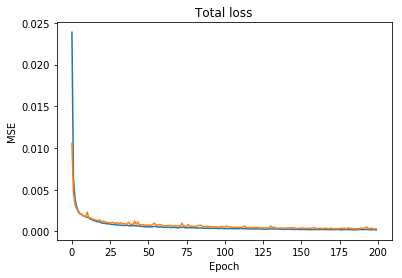

In [13]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title("Total loss")

In [14]:
y_test_pred = model.predict(x_test)

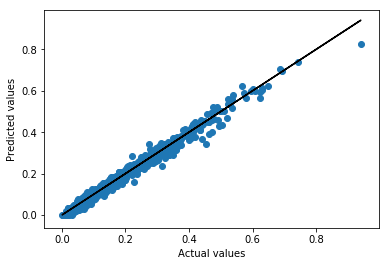

R^2:  0.9818680556791684


In [15]:
plt.scatter(y_test,y_test_pred)
plt.plot(y_test,y_test,'black')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

print('R^2: ',metrics.r2_score(y_test,y_test_pred))